# Ward Hierarchical Clustering

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load dataset
df = pd.read_csv("mall_customers.csv")

In [8]:
# Select features (no scaling)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [10]:
# Model
model = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels = model.fit_predict(X)

In [12]:
# Evaluate
sil_score = silhouette_score(X, labels)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.5529945955148897


In [14]:
# Add labels
df['Cluster'] = labels

In [16]:
df.head(6) # after updating labels

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3


In [18]:
df['Cluster'].value_counts

<bound method IndexOpsMixin.value_counts of 0      4
1      3
2      4
3      3
4      4
      ..
195    2
196    0
197    2
198    0
199    2
Name: Cluster, Length: 200, dtype: int64>

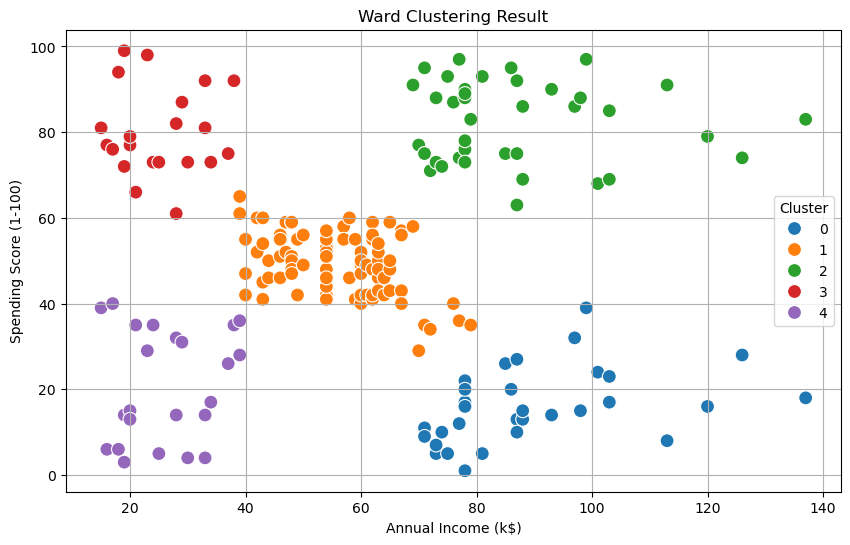

In [20]:
# Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10', s=100)
plt.title("Ward Clustering Result")
plt.grid(True)
plt.show()